In [117]:
import numpy as np
import pandas as pd

In [118]:
aapl_df = pd.read_csv('AAPL.csv')
msft_df = pd.read_csv('MSFT.csv')

In [119]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [120]:
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.132248,53228400
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.911709,54119000
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.279816,64059600
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.098019,54976600
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.543629,62013600


In [121]:
pair_df = pd.merge(aapl_df, msft_df, on='Date')
pair_df = pair_df.loc[pair_df['Date'] > '2012-01-01'].reset_index(drop=True)
pair_df.head()

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800,26.549999,26.959999,26.389999,26.770000,21.278028,64731500
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000,26.820000,27.469999,26.780001,27.400000,21.778778,80516100
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600,27.379999,27.730000,27.290001,27.680000,22.001341,56081400
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800,27.530001,28.190001,27.530001,28.110001,22.343124,99455500
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400,28.049999,28.100000,27.719999,27.740000,22.049028,59706800


In [122]:
aapl_base = pair_df.loc[0, 'Close_x']
msft_base = pair_df.loc[0, 'Close_y']
print(aapl_base, msft_base)

14.686786 26.77


In [123]:
pair_df['Norm_x'] = pair_df['Close_x']/aapl_base
pair_df['Norm_y'] = pair_df['Close_y']/msft_base
pair_df['Ratio'] = pair_df['Norm_x']/pair_df['Norm_y']
pair_df

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Norm_x,Norm_y,Ratio
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.557464,302220800,26.549999,26.959999,26.389999,26.770000,21.278028,64731500,1.000000,1.000000,1.000000
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.624949,260022000,26.820000,27.469999,26.780001,27.400000,21.778778,80516100,1.005374,1.023534,0.982258
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.765109,271269600,27.379999,27.730000,27.290001,27.680000,22.001341,56081400,1.016536,1.033993,0.983116
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.898556,318292800,27.530001,28.190001,27.530001,28.110001,22.343124,99455500,1.027162,1.050056,0.978198
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.878093,394024400,28.049999,28.100000,27.719999,27.740000,22.049028,59706800,1.025533,1.036235,0.989673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100,245.110001,249.020004,241.529999,242.259995,238.948761,46135800,8.979501,9.049682,0.992245
2629,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300,243.860001,245.740005,241.509995,244.490005,241.148300,28651500,9.039418,9.132985,0.989755
2630,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000,248.309998,255.300003,246.419998,251.759995,248.318909,33111700,9.221214,9.404557,0.980505
2631,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900,245.979996,247.419998,243.020004,244.970001,241.621719,33169200,8.855579,9.150915,0.967726


<Axes: xlabel='Date'>

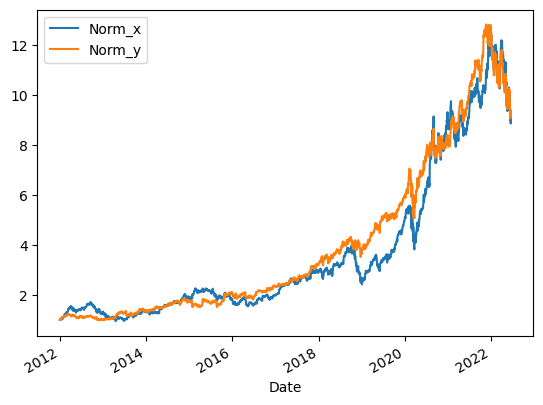

In [124]:
pair_df.plot('Date', ['Norm_x', 'Norm_y'])

In [125]:
sd_2 = 2*pair_df['Ratio'].std()
pair_df['Outlier'] = ~pair_df['Ratio'].between(pair_df['Ratio'].mean()-sd_2, pair_df['Ratio'].mean()+sd_2)

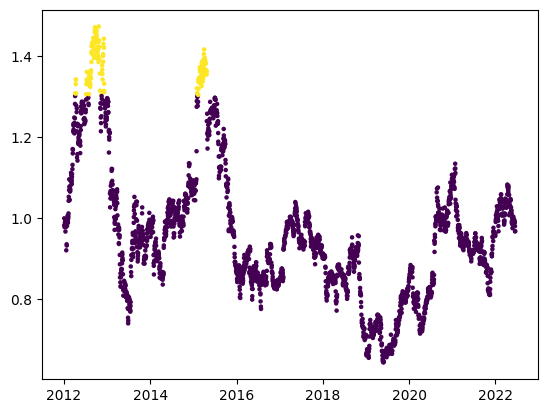

In [126]:
import matplotlib.pyplot as plt
plt.scatter(pair_df['Date'], pair_df['Ratio'], c=pair_df['Outlier'], s=5)
plt.show()